In [ ]:
# Import Libraries
import os
import gc
import shutil
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings("ignore")

import xml.etree.ElementTree as xet


In [ ]:
!git clone https://github.com/ultralytics/ultralytics

!pip install ultralytics
!pip install -U ray[tune]

Cloning into 'ultralytics'...
remote: Enumerating objects: 46141, done.
remote: Counting objects: 100% (334/334), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 46141 (delta 207), reused 221 (delta 141), pack-reused 45807 (from 1)
Receiving objects: 100% (46141/46141), 38.26 MiB | 9.44 MiB/s, done.
Resolving deltas: 100% (34375/34375), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 13.0 MB/s eta 0:00:00


In [ ]:
%%writefile /content/ultralytics/custom_dataset.yaml


train: /content/datasets/train
val: /content/datasets/val
test: /content/datasets/test

nc: 1

names: [
    'license_plate'
]

Writing /content/ultralytics/custom_dataset.yaml


In [ ]:

# %%writefile /content/config.yaml

# path: /content/dataset
# train: images
# val: images

# nc: 1

# names: [
#     'license_plate'
# ]

Writing /content/config.yaml


In [ ]:
# %%writefile /content/dataset/config.yaml

# path: /content/dataset
# train: images
# val: images

# nc: 1

# names: [
#     'license_plate'
# ]

In [ ]:
# dataset
#   images
#     train
#     test
#     val
#   labels
#     train
#     test
#     val

In [ ]:
!wandb disabled

!yolo train model=yolov8n.pt data="/content/config.yaml" epochs=10 verbose=True batch=32

W&B disabled.
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/config.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

In [ ]:
# # Get Bounding Box Predictions
from ultralytics import YOLO

path = "/content/dataset/images/0a0d1748-48cd-4114-90cb-b5baf0b3cbe4___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_147274518_15141875973_large.jpg"

yolo_model = YOLO('/content/best.pt')
bbox_results = yolo_model.predict(path, verbose=False)




In [ ]:
all_box_list = []
all_conf_list = []


for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []
    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)
        if(conf>=0.5):
            box_list.append(box_data)
            conf_list.append(conf)

    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

In [ ]:
all_conf_list

[[0.85]]

In [ ]:

# for i in bbox_results:
#   print(i.boxes)

print(all_box_list[0])
print(all_conf_list)


# for i, box in enumerate(boxes):
#   print(i, box)

[[191, 317, 329, 352]]
[[0.85]]


In [ ]:
ori_path = path
print(ori_path)
ori_image = cv2.imread(ori_path)
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

/content/dataset/images/0a0d1748-48cd-4114-90cb-b5baf0b3cbe4___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_147274518_15141875973_large.jpg


In [ ]:
from ultralytics.utils.plotting import Annotator


annotator = Annotator(ori_image)
boxes = all_box_list
confs = all_conf_list

In [ ]:
for i in all_box_list[0]:
  print(i)

[191, 317, 329, 352]


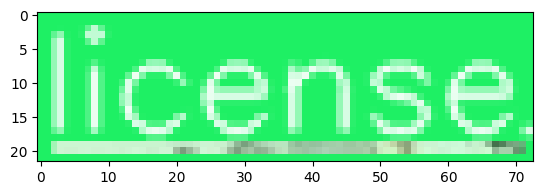

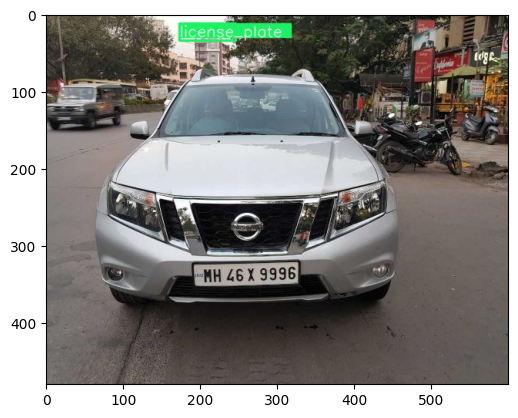

In [ ]:
import matplotlib.pyplot as plt

# for i, box in enumerate(boxes):
#   print(i)
box = [173, 12, 246, 34]
confs = 0.120
annotator.box_label(box=box, label="license_plate ", color=(30, 240, 100))

# Get Plate Object
x1, y1, x2, y2 = box
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
roi = ori_image[y1:y2, x1:x2]
plt.imshow(roi)
plt.show()

# Show Image
frame = annotator.result()
plt.imshow(frame)
plt.show()

In [ ]:
print(all_box_list)

[[[338, 315, 452, 345]]]


In [ ]:
all_conf_list

[[0.83]]